# Data Scaling

In questo quaderno proverò a riscalare i dati, in modo tale che quando vado a fare la PCA, che sostanzialmente riguarda il calcolo di matrici di covarianza, si possa lavorare sulle effettive dispersioni delle singole features invece di essere dominati da una fluttuazione assoluta di una certa feature.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import preprocessing, decomposition

In [2]:
%%time

dati = np.load("Dataset/dati_puliti.npz")
X = dati["X"]
y = dati["y"]

print(X.shape)
print(y.shape)


(129592, 50)
(129592,)
CPU times: total: 125 ms
Wall time: 738 ms


# Alcune grandezze statistiche delle features

Studio di seguito alcune grandezze statistiche associate a ciascuna feature.  
Usare la seguente cella per generare l'output da pastare nella successiva cella di markdown per avere una tabella

In [3]:
print(f"Feature | Min | Max | Range | Mean | Std | Unique Val")
print(f"--- | --- | --- | --- | --- | --- | ---")

for i in range(X.shape[1]):
    
    tmpFeature = X[:,i]
    
    print(f"{i}\t| {tmpFeature.min():.2f}\t| {tmpFeature.max():.2f}\t| {tmpFeature.max() - tmpFeature.min():.2f}\t| {tmpFeature.mean():.2f}\t| {tmpFeature.std():.2f}\t| {len(np.unique(tmpFeature))} ")

Feature | Min | Max | Range | Mean | Std | Unique Val
--- | --- | --- | --- | --- | --- | ---
0	| 0.00	| 17.10	| 17.10	| 4.86	| 1.16	| 791 
1	| 0.06	| 8.80	| 8.74	| 1.49	| 0.86	| 1544 
2	| 0.01	| 4750.00	| 4749.99	| 127.85	| 184.37	| 3469 
3	| 0.10	| 0.74	| 0.63	| 0.28	| 0.06	| 518 
4	| -0.16	| 0.18	| 0.33	| 0.01	| 0.01	| 2382 
5	| 0.00	| 0.70	| 0.70	| 0.16	| 0.12	| 2265 
6	| 0.00	| 6.24	| 6.24	| 0.97	| 0.34	| 1047 
7	| 0.03	| 0.99	| 0.96	| 0.82	| 0.07	| 708 
8	| 2.38	| 7.17	| 4.79	| 3.45	| 0.26	| 343 
9	| 0.03	| 0.53	| 0.49	| 0.17	| 0.04	| 744 
10	| 0.00	| 9.56	| 9.56	| 4.32	| 0.34	| 544 
11	| -6.96	| 537.00	| 543.96	| 165.64	| 114.93	| 4562 
12	| -1.00	| 1.00	| 2.00	| 0.45	| 0.52	| 4242 
13	| 0.00	| 1.00	| 1.00	| 0.31	| 0.24	| 2882 
14	| 0.96	| 11.30	| 10.34	| 2.25	| 0.70	| 691 
15	| 135.00	| 6910.00	| 6775.00	| 940.01	| 643.59	| 1323 
16	| 0.00	| 3.90	| 3.90	| 0.46	| 0.42	| 2083 
17	| 0.63	| 1100.00	| 1099.37	| 27.00	| 30.13	| 2092 
18	| 0.06	| 0.76	| 0.70	| 0.27	| 0.05	| 516 
19	| 

Feature | Min | Max | Range | Mean | Std | Unique Val
--- | --- | --- | --- | --- | --- | ---
0	| 0.00	| 17.10	| 17.10	| 4.86	| 1.16	| 791 
1	| 0.06	| 8.80	| 8.74	| 1.49	| 0.86	| 1544 
2	| 0.01	| 4750.00	| 4749.99	| 127.85	| 184.37	| 3469 
3	| 0.10	| 0.74	| 0.63	| 0.28	| 0.06	| 518 
4	| -0.16	| 0.18	| 0.33	| 0.01	| 0.01	| 2382 
5	| 0.00	| 0.70	| 0.70	| 0.16	| 0.12	| 2265 
6	| 0.00	| 6.24	| 6.24	| 0.97	| 0.34	| 1047 
7	| 0.03	| 0.99	| 0.96	| 0.82	| 0.07	| 708 
8	| 2.38	| 7.17	| 4.79	| 3.45	| 0.26	| 343 
9	| 0.03	| 0.53	| 0.49	| 0.17	| 0.04	| 744 
10	| 0.00	| 9.56	| 9.56	| 4.32	| 0.34	| 544 
11	| -6.96	| 537.00	| 543.96	| 165.64	| 114.93	| 4562 
12	| -1.00	| 1.00	| 2.00	| 0.45	| 0.52	| 4242 
13	| 0.00	| 1.00	| 1.00	| 0.31	| 0.24	| 2882 
14	| 0.96	| 11.30	| 10.34	| 2.25	| 0.70	| 691 
15	| 135.00	| 6910.00	| 6775.00	| 940.01	| 643.59	| 1323 
16	| 0.00	| 3.90	| 3.90	| 0.46	| 0.42	| 2083 
17	| 0.63	| 1100.00	| 1099.37	| 27.00	| 30.13	| 2092 
18	| 0.06	| 0.76	| 0.70	| 0.27	| 0.05	| 516 
19	| -5.23	| 7.54	| 12.77	| 0.79	| 0.47	| 3873 
20	| -23.60	| 22.40	| 46.00	| -0.10	| 1.88	| 5909 
21	| 0.05	| 0.60	| 0.55	| 0.31	| 0.05	| 454 
22	| 0.00	| 1430.00	| 1430.00	| 84.55	| 85.19	| 2429 
23	| 1.16	| 78.40	| 77.24	| 3.85	| 1.80	| 1043 
24	| 0.00	| 0.50	| 0.50	| 0.44	| 0.06	| 456 
25	| -39.60	| 4.72	| 44.32	| -0.60	| 2.09	| 5906 
26	| 0.00	| 1020.00	| 1020.00	| 101.36	| 72.98	| 2862 
27	| 0.76	| 3.65	| 2.89	| 1.57	| 0.26	| 339 
28	| 0.00	| 0.65	| 0.65	| 0.17	| 0.06	| 1093 
29	| -3.35	| 5.87	| 9.22	| -0.31	| 0.60	| 5346 
30	| 2.39	| 23.90	| 21.51	| 7.57	| 2.31	| 854 
31	| -1.55	| 4.13	| 5.68	| 1.02	| 0.39	| 2124 
32	| 0.00	| 7.99	| 7.99	| 1.22	| 0.76	| 1394 
33	| 6.34	| 500.00	| 493.66	| 366.85	| 96.60	| 920 
34	| 0.00	| 0.40	| 0.40	| 0.07	| 0.04	| 2162 
35	| 0.04	| 0.90	| 0.85	| 0.30	| 0.07	| 605 
36	| -1.66	| 8.19	| 9.85	| 0.39	| 0.85	| 5269 
37	| -13.20	| 0.67	| 13.87	| -2.78	| 1.00	| 1420 
38	| 0.14	| 6.06	| 5.92	| 1.28	| 0.29	| 904 
39	| 0.00	| 0.43	| 0.43	| 0.09	| 0.04	| 1350 
40	| 33.90	| 332.00	| 298.10	| 145.30	| 31.77	| 677 
41	| -388.00	| 161.00	| 549.00	| -21.71	| 33.86	| 5339 
42	| -1.69	| 43.70	| 45.39	| 0.73	| 1.22	| 5500 
43	| 0.25	| 85.80	| 85.55	| 6.01	| 4.56	| 1489 
44	| 0.00	| 0.45	| 0.45	| 0.01	| 0.03	| 2248 
45	| 0.00	| 0.61	| 0.61	| 0.18	| 0.08	| 1789 
46	| -32.10	| 1.93	| 34.03	| -0.16	| 0.98	| 5900 
47	| -13.50	| 21.80	| 35.30	| 2.86	| 1.92	| 1908 
48	| -16.00	| 25.40	| 41.40	| 1.61	| 1.96	| 5724 
49	| 0.00	| 0.62	| 0.62	| 0.23	| 0.05	| 861 

# Scaling

Dalla tabella precedente notiamo che abbiamo grandezze che variano su scale differenti. Pertanto è necessario procedere con una normalizzazione

In [4]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X_scaled_minmax = scaler.transform(X)

scaler = preprocessing.MaxAbsScaler()
scaler.fit(X)
X_scaled_maxabs = scaler.transform(X)

scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scaled_normal = scaler.transform(X)

scaler = preprocessing.RobustScaler()
scaler.fit(X)
X_scaled_robust = scaler.transform(X)

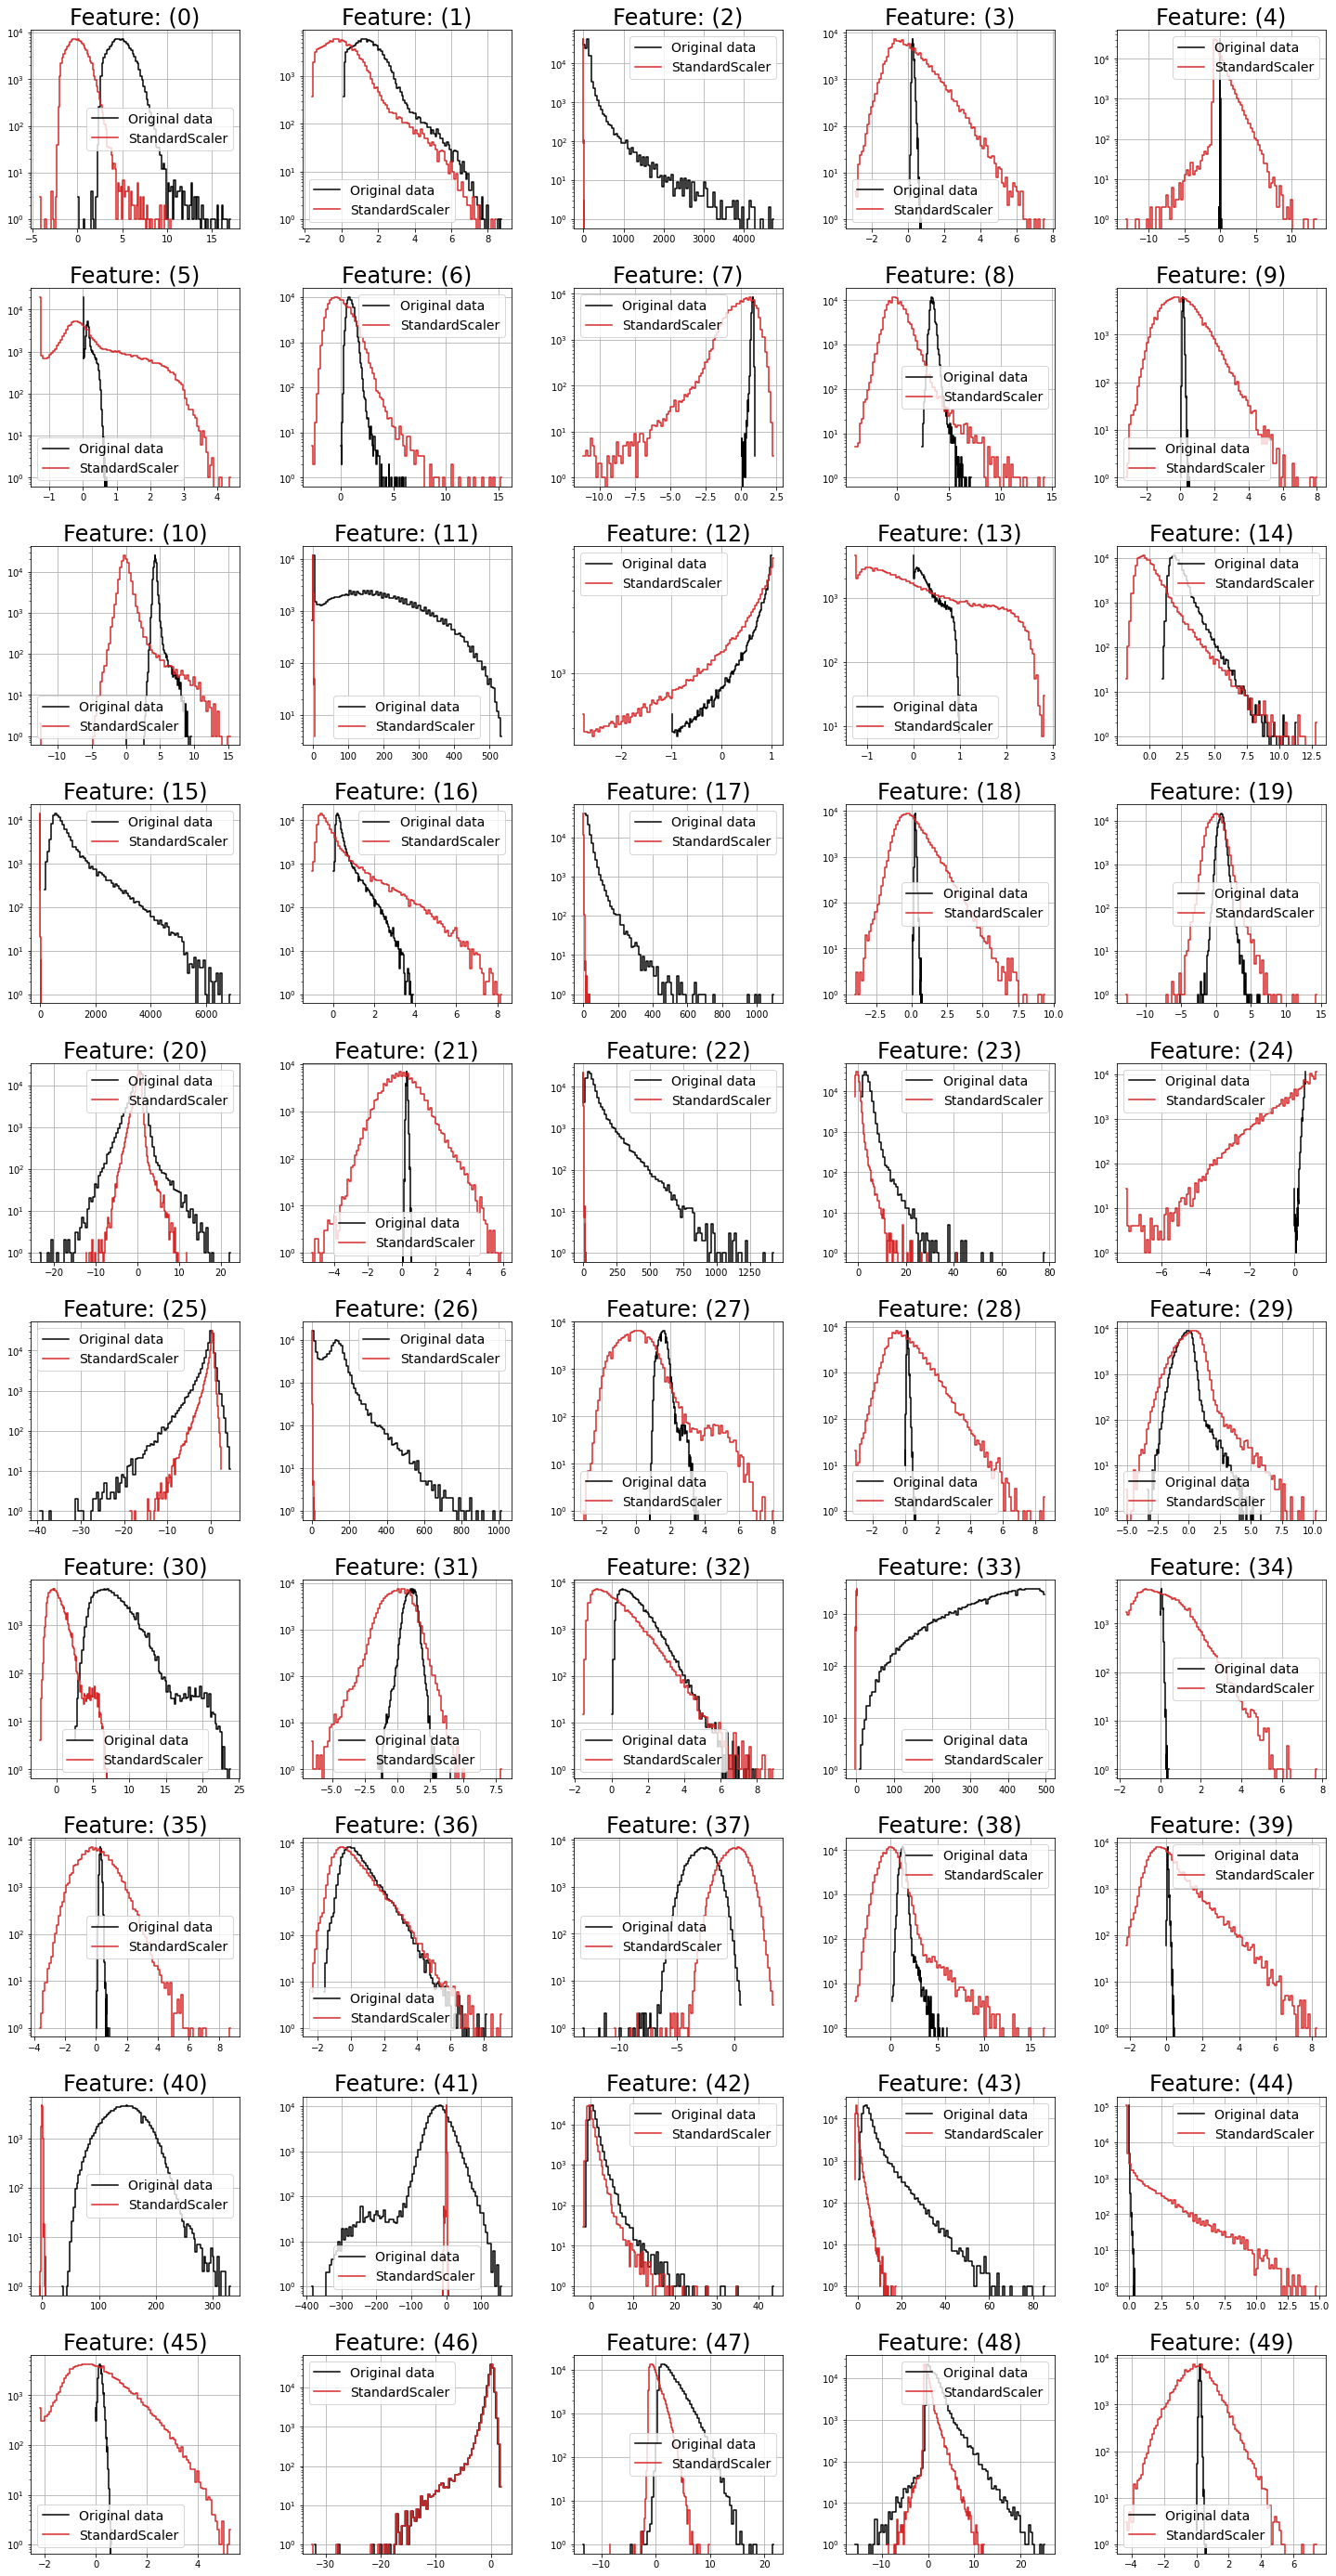

CPU times: total: 26 s
Wall time: 26.9 s


In [5]:
%%time

nBins = 100

fig, ax = plt.subplots(10, 5)
fig.set_size_inches(25,50)
fig.subplots_adjust(hspace = .3, wspace = .3)
ax = ax.flatten()

for i in range(X.shape[1]):
    h, bins = np.histogram(X[:,i], bins = nBins)
    binc = bins[:-1] + (bins[1] - bins[0])/2
    ax[i].plot(binc, h, ds = "steps-mid", label = "Original data", c = "k", ls = "-")
    
    # h, bins = np.histogram(X_scaled_minmax[:,i], bins = nBins)
    # binc = bins[:-1] + (bins[1] - bins[0])/2
    # ax[i].plot(binc, h, ds = "steps-mid", label = "MinMaxScaler", )#c = "tab:green")
    
    # h, bins = np.histogram(X_scaled_maxabs[:,i], bins = nBins)
    # binc = bins[:-1] + (bins[1] - bins[0])/2
    # ax[i].plot(binc, h, ds = "steps-mid", label = "MaxAbsScaler", )#c = "tab:green")
    
    h, bins = np.histogram(X_scaled_normal[:,i], bins = nBins)
    binc = bins[:-1] + (bins[1] - bins[0])/2
    ax[i].plot(binc, h, ds = "steps-mid", label = "StandardScaler", c = "tab:red")
    
    # h, bins = np.histogram(X_scaled_robust[:,i], bins = nBins)
    # binc = bins[:-1] + (bins[1] - bins[0])/2
    # ax[i].plot(binc, h, ds = "steps-mid", label = "RobustScaler", )#c = "tab:green")
    
    ax[i].set_yscale("log")
    
    
    ax[i].grid()
    ax[i].set_title(f"Feature: ({i})", fontsize = 24)
    
    ax[i].legend(fontsize = 14)
    
    
fig.savefig("../LATEX/FIGURE/02-dist-features-rescaled.pdf", format = "pdf", bbox_inches = "tight")

plt.show()


Particolare su una sola feature

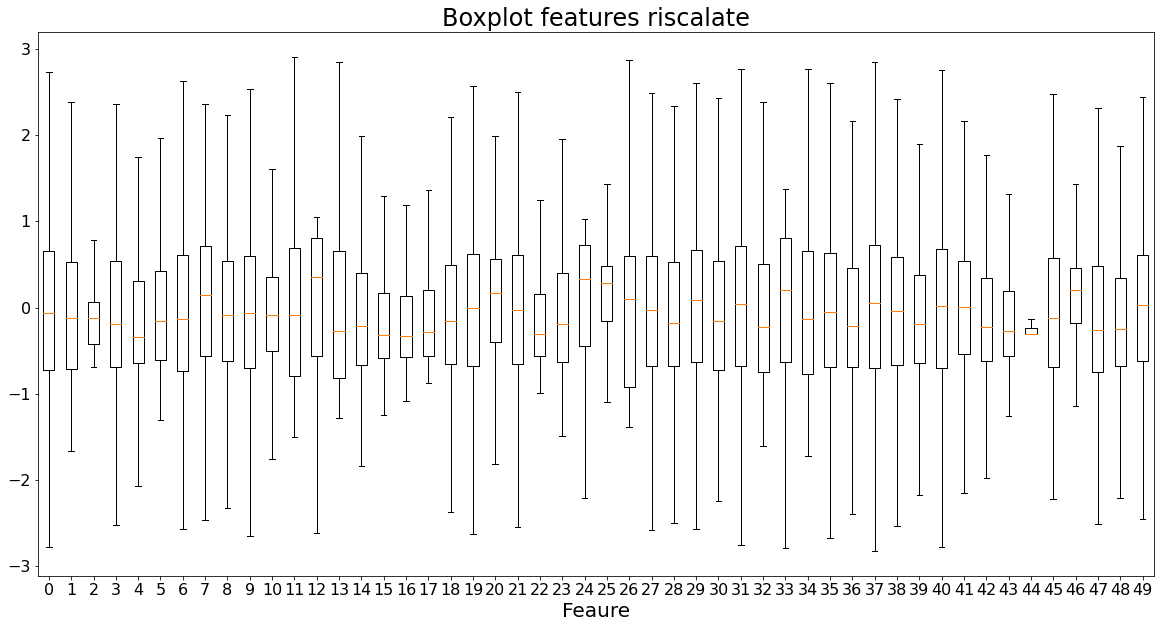

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)

ax.boxplot(X_scaled_normal, showfliers = False)

ax.set_xlabel("Feaure", fontsize = 20)
ax.set_title("Boxplot features riscalate", fontsize = 24)


ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xticklabels(ax.get_xticks()-1, )#fontdict = {"fontsize":16})
#ax.set_yticklabels(ax.get_yticks(), fontdict = {"fontsize":16})
#print(ax.get_xticks())
#ax.set_ylim(-3,3)

fig.savefig("../LATEX/FIGURE/02-box-plot.pdf", format = "pdf", bbox_inches = "tight")

plt.show()

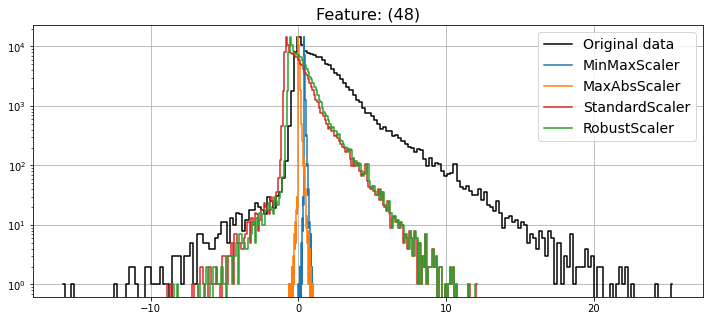

CPU times: total: 406 ms
Wall time: 409 ms


In [7]:
%%time

nBins = 200

fig, ax = plt.subplots()
fig.set_size_inches(12, 5)

# >> Num feature
i=48

h, bins = np.histogram(X[:,i], bins = nBins)
binc = bins[:-1] + (bins[1] - bins[0])/2
ax.plot(binc, h, ds = "steps-mid", label = "Original data", c = "k", ls = "-")

h, bins = np.histogram(X_scaled_minmax[:,i], bins = nBins)
binc = bins[:-1] + (bins[1] - bins[0])/2
ax.plot(binc, h, ds = "steps-mid", label = "MinMaxScaler", )#c = "tab:green")

h, bins = np.histogram(X_scaled_maxabs[:,i], bins = nBins)
binc = bins[:-1] + (bins[1] - bins[0])/2
ax.plot(binc, h, ds = "steps-mid", label = "MaxAbsScaler", )#c = "tab:green")

h, bins = np.histogram(X_scaled_normal[:,i], bins = nBins)
binc = bins[:-1] + (bins[1] - bins[0])/2
ax.plot(binc, h, ds = "steps-mid", label = "StandardScaler", c = "tab:red")

h, bins = np.histogram(X_scaled_robust[:,i], bins = nBins)
binc = bins[:-1] + (bins[1] - bins[0])/2
ax.plot(binc, h, ds = "steps-mid", label = "RobustScaler", )#c = "tab:green")
    

ax.set_yscale("log")

    
ax.grid()
ax.set_title(f"Feature: ({i})", fontsize = 16)

ax.legend(fontsize = 14)
    
plt.show()

Per la natura delle feature che ho, lo scaler `StandardScaler` è la migliore scelta. Guardiamo nuovamente le stesse grandezze statistiche di prima

In [8]:
print(f"Feature | Min | Max | Range | Mean | Std | Unique Val")
print(f"--- | --- | --- | --- | --- | --- | ---")

for i in range(X_scaled_normal.shape[1]):
    
    tmpFeature = X_scaled_normal[:,i]
    
    print(f"{i}\t| {tmpFeature.min():.2f}\t| {tmpFeature.max():.2f}\t| {tmpFeature.max() - tmpFeature.min():.2f}\t| {tmpFeature.mean():.2f}\t| {tmpFeature.std():.2f}\t| {len(np.unique(tmpFeature))} ")

Feature | Min | Max | Range | Mean | Std | Unique Val
--- | --- | --- | --- | --- | --- | ---
0	| -4.19	| 10.54	| 14.73	| 0.00	| 1.00	| 791 
1	| -1.66	| 8.49	| 10.16	| 0.00	| 1.00	| 1544 
2	| -0.69	| 25.07	| 25.76	| -0.00	| 1.00	| 3469 
3	| -2.99	| 7.62	| 10.61	| 0.00	| 1.00	| 518 
4	| -13.23	| 13.58	| 26.82	| -0.00	| 1.00	| 2382 
5	| -1.31	| 4.42	| 5.73	| 0.00	| 1.00	| 2265 
6	| -2.83	| 15.37	| 18.20	| 0.00	| 1.00	| 1047 
7	| -11.22	| 2.36	| 13.57	| 0.00	| 1.00	| 708 
8	| -4.14	| 14.38	| 18.52	| -0.00	| 1.00	| 343 
9	| -3.21	| 8.03	| 11.25	| 0.00	| 1.00	| 744 
10	| -12.67	| 15.36	| 28.03	| 0.00	| 1.00	| 544 
11	| -1.50	| 3.23	| 4.73	| -0.00	| 1.00	| 4562 
12	| -2.78	| 1.05	| 3.82	| -0.00	| 1.00	| 4242 
13	| -1.28	| 2.85	| 4.13	| 0.00	| 1.00	| 2882 
14	| -1.84	| 12.89	| 14.73	| 0.00	| 1.00	| 691 
15	| -1.25	| 9.28	| 10.53	| 0.00	| 1.00	| 1323 
16	| -1.09	| 8.26	| 9.35	| 0.00	| 1.00	| 2083 
17	| -0.88	| 35.62	| 36.49	| 0.00	| 1.00	| 2092 
18	| -4.05	| 9.44	| 13.49	| -0.00	| 1.00	| 516 


Feature | Min | Max | Range | Mean | Std | Unique Val
--- | --- | --- | --- | --- | --- | ---
0	| -4.19	| 10.54	| 14.73	| 0.00	| 1.00	| 791 
1	| -1.66	| 8.49	| 10.16	| 0.00	| 1.00	| 1544 
2	| -0.69	| 25.07	| 25.76	| -0.00	| 1.00	| 3469 
3	| -2.99	| 7.62	| 10.61	| 0.00	| 1.00	| 518 
4	| -13.23	| 13.58	| 26.82	| -0.00	| 1.00	| 2382 
5	| -1.31	| 4.42	| 5.73	| 0.00	| 1.00	| 2265 
6	| -2.83	| 15.37	| 18.20	| 0.00	| 1.00	| 1047 
7	| -11.22	| 2.36	| 13.57	| 0.00	| 1.00	| 708 
8	| -4.14	| 14.38	| 18.52	| -0.00	| 1.00	| 343 
9	| -3.21	| 8.03	| 11.25	| 0.00	| 1.00	| 744 
10	| -12.67	| 15.36	| 28.03	| 0.00	| 1.00	| 544 
11	| -1.50	| 3.23	| 4.73	| -0.00	| 1.00	| 4562 
12	| -2.78	| 1.05	| 3.82	| -0.00	| 1.00	| 4242 
13	| -1.28	| 2.85	| 4.13	| 0.00	| 1.00	| 2882 
14	| -1.84	| 12.89	| 14.73	| 0.00	| 1.00	| 691 
15	| -1.25	| 9.28	| 10.53	| 0.00	| 1.00	| 1323 
16	| -1.09	| 8.26	| 9.35	| 0.00	| 1.00	| 2083 
17	| -0.88	| 35.62	| 36.49	| 0.00	| 1.00	| 2092 
18	| -4.05	| 9.44	| 13.49	| -0.00	| 1.00	| 516 
19	| -12.87	| 14.44	| 27.30	| 0.00	| 1.00	| 3873 
20	| -12.51	| 11.98	| 24.49	| -0.00	| 1.00	| 5909 
21	| -5.40	| 5.99	| 11.39	| 0.00	| 1.00	| 454 
22	| -0.99	| 15.79	| 16.79	| -0.00	| 1.00	| 2429 
23	| -1.49	| 41.43	| 42.92	| -0.00	| 1.00	| 1043 
24	| -7.61	| 1.03	| 8.64	| -0.00	| 1.00	| 456 
25	| -18.69	| 2.55	| 21.24	| 0.00	| 1.00	| 5906 
26	| -1.39	| 12.59	| 13.98	| 0.00	| 1.00	| 2862 
27	| -3.13	| 8.04	| 11.17	| -0.00	| 1.00	| 339 
28	| -3.14	| 8.67	| 11.81	| 0.00	| 1.00	| 1093 
29	| -5.11	| 10.37	| 15.48	| 0.00	| 1.00	| 5346 
30	| -2.25	| 7.07	| 9.32	| 0.00	| 1.00	| 854 
31	| -6.62	| 8.03	| 14.65	| 0.00	| 1.00	| 2124 
32	| -1.60	| 8.95	| 10.55	| 0.00	| 1.00	| 1394 
33	| -3.73	| 1.38	| 5.11	| 0.00	| 1.00	| 920 
34	| -1.72	| 7.74	| 9.46	| 0.00	| 1.00	| 2162 
35	| -3.68	| 8.74	| 12.42	| -0.00	| 1.00	| 605 
36	| -2.40	| 9.13	| 11.53	| 0.00	| 1.00	| 5269 
37	| -10.45	| 3.46	| 13.90	| 0.00	| 1.00	| 1420 
38	| -3.95	| 16.58	| 20.53	| 0.00	| 1.00	| 904 
39	| -2.24	| 8.30	| 10.54	| 0.00	| 1.00	| 1350 
40	| -3.51	| 5.88	| 9.38	| -0.00	| 1.00	| 677 
41	| -10.82	| 5.40	| 16.21	| -0.00	| 1.00	| 5339 
42	| -1.98	| 35.09	| 37.07	| 0.00	| 1.00	| 5500 
43	| -1.26	| 17.49	| 18.75	| 0.00	| 1.00	| 1489 
44	| -0.31	| 14.83	| 15.14	| -0.00	| 1.00	| 2248 
45	| -2.22	| 5.31	| 7.54	| 0.00	| 1.00	| 1789 
46	| -32.67	| 2.14	| 34.81	| 0.00	| 1.00	| 5900 
47	| -8.53	| 9.88	| 18.41	| -0.00	| 1.00	| 1908 
48	| -8.98	| 12.13	| 21.12	| 0.00	| 1.00	| 5724 
49	| -4.37	| 7.47	| 11.83	| -0.00	| 1.00	| 861 

# PCA

## Matrice di covarianza
Inizio col guardare la matrice di covarianza dei miei dati riscalati

In [9]:
# Scelgo i dati riscalati tra quelli di prima


# Variabile per modificare rapidamente
scaledMode = "StandardScaler"

if scaledMode == "MinMaxScaler":
    X_scaled = X_scaled_minmax
elif scaledMode == "MaxAbsScaler":
    X_scaled = X_scaled_maxabs
elif scaledMode == "StandardScaler":
    X_scaled = X_scaled_normal
elif scaledMode == "RobustScaler":
    X_scaled = X_scaled_robust
        
        

In [10]:
myCov = np.cov(X_scaled, rowvar = False)
myCov.shape

(50, 50)

TODO: Migliorare i colori...

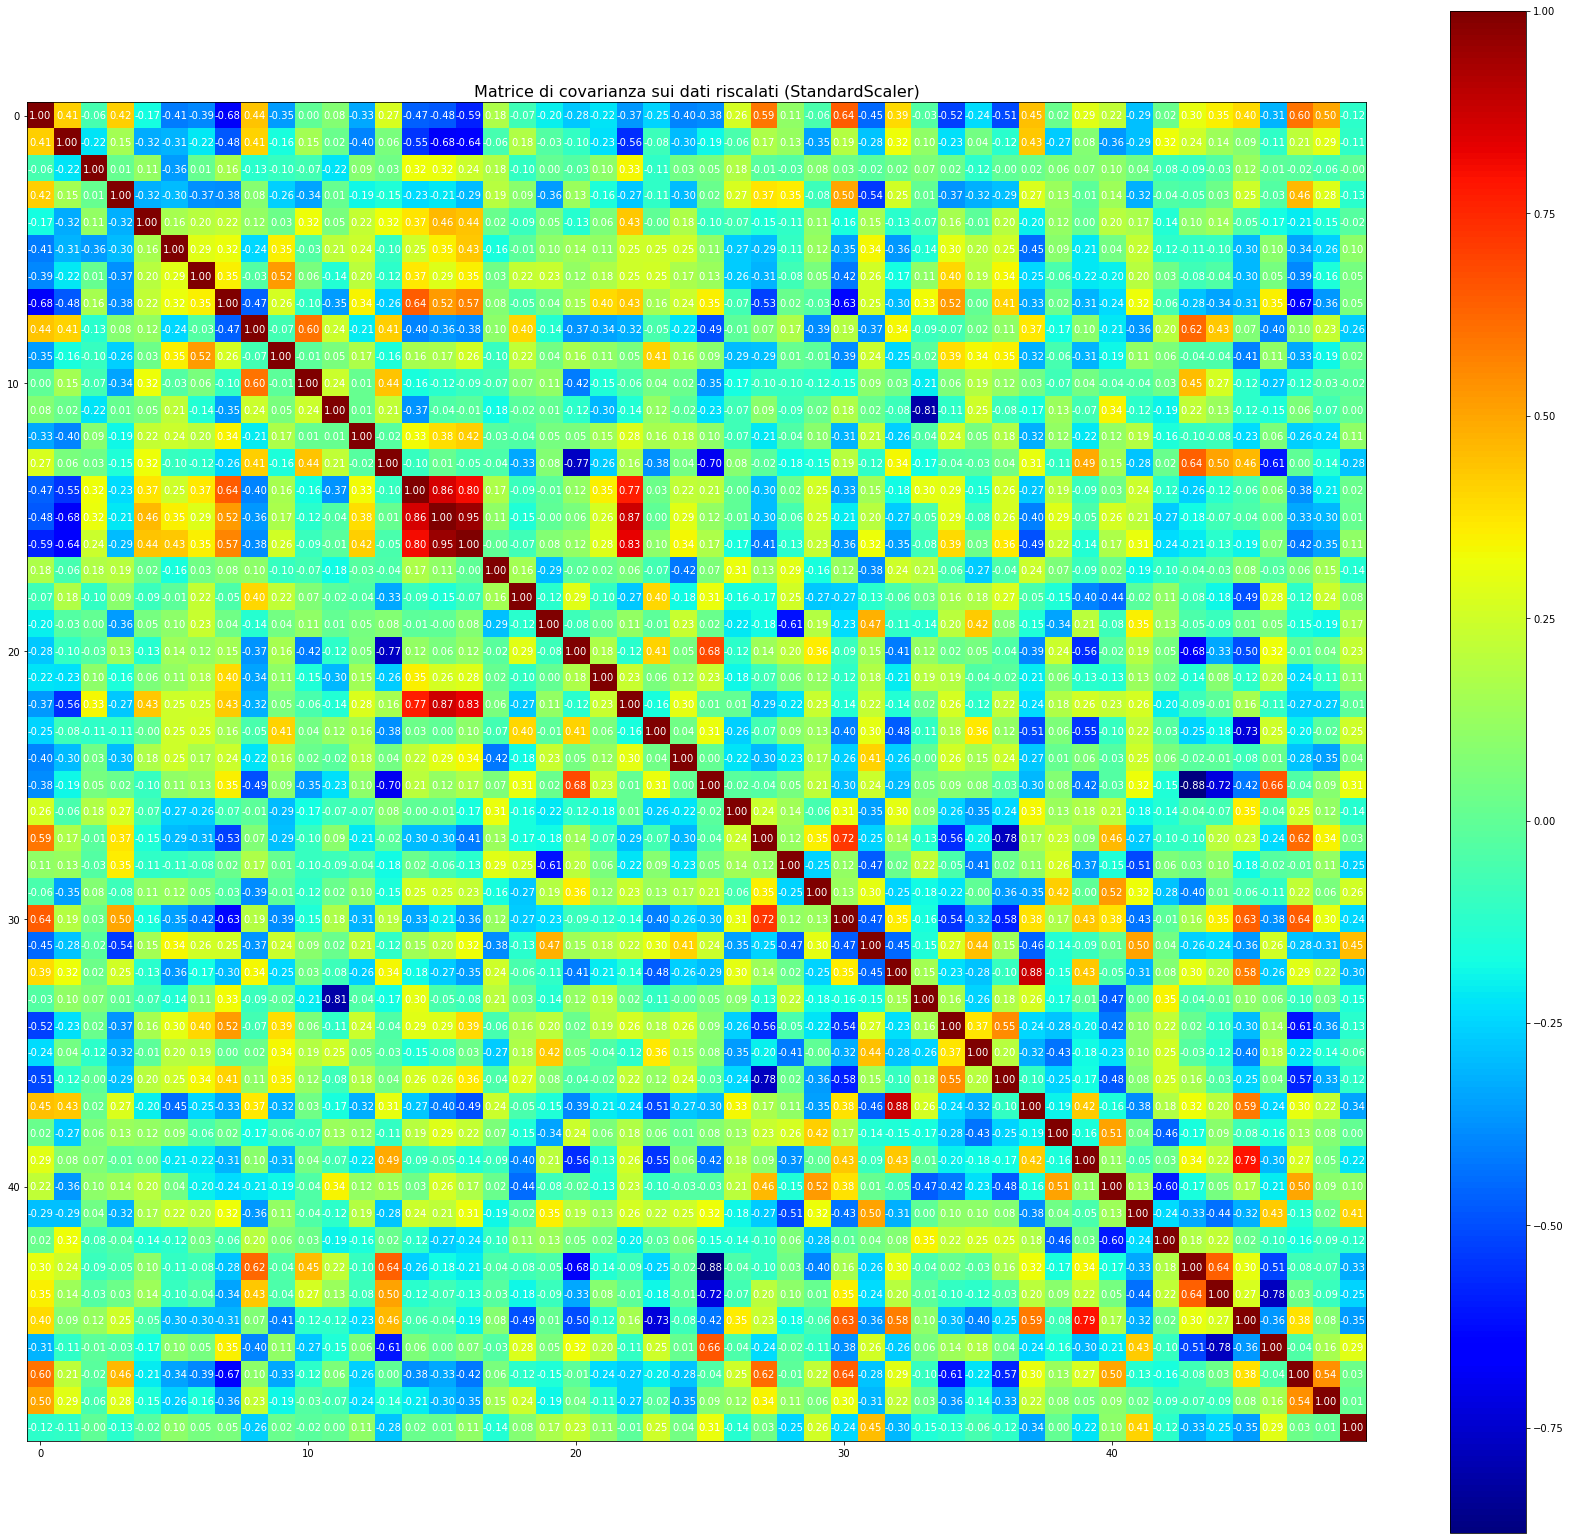

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 28)

# Plotto la matrice di covarianza
im = ax.imshow(myCov, cmap = "jet", origin = "upper")

ax.set_title(f"Matrice di covarianza sui dati riscalati ({scaledMode})", fontsize = 16)

# Stampo i valori sulle celle
for i in range(myCov.shape[0]):
    for j in range(myCov.shape[1]):
        text = ax.text(j, i, f"{myCov[i, j]:.2f}",
                       ha="center", va="center", color="w", )#weight="semibold")

# Disegno la colorbar
fig.colorbar(im)

# Per la relazione devo rinunciare ai numeri...
# fig.savefig("../LATEX/FIGURE/02-cov-matrix.pdf", format = "pdf", bbox_inches = "tight")

plt.show()


Per definizione dello scaler scelto, sulla diagonale ho sempre 1. Lo standard scaler riscala infatti in modo tale da porre $\sigma = 1$, e sulla diagonale ho $\sigma^2$

In [12]:
# Applico la PCA
pca = decomposition.PCA()
pca.fit(X_scaled)
#x_pca = pca.transform(x_scaled)

# Estraggo le Explained Variances
X_ev = pca.explained_variance_ratio_
X_cumev = np.cumsum(X_ev)

"""
Prove su features e numero di componenti
Nota bene: Come osservato in fase di grid search, in base al particolare blocco
di TrS può variare, di circa una feature...
"""
print(f"Soglia 90 %: {np.sum(X_cumev < .9)} features")
print(f"Soglia 95 %: {np.sum(X_cumev < .95)} features")
print(f"Soglia 98 %: {np.sum(X_cumev < .98)} features")
print(f"Soglia 99 %: {np.sum(X_cumev < .99)} features")


Soglia 90 %: 22 features
Soglia 95 %: 29 features
Soglia 98 %: 36 features
Soglia 99 %: 41 features


Disegno le combinazioni lineari degli assi principali  
Non ha un grande significato...

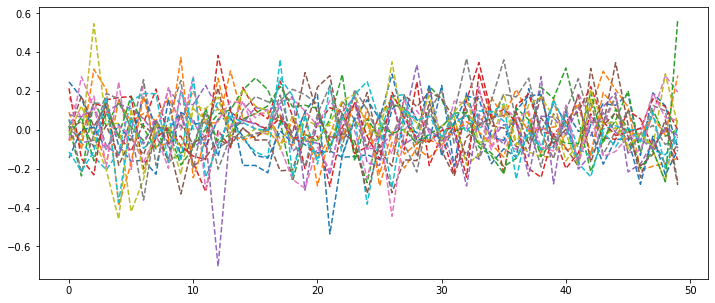

In [13]:
pca.components_.shape

# Non mi sembra che ci sia una componente che significativamente conta più di tutte..

fig, ax = plt.subplots()
fig.set_size_inches(12,5)

for i in range(20):
    ax.plot(pca.components_[i], ls = "--" )
    
plt.show()

Features < thr: 29


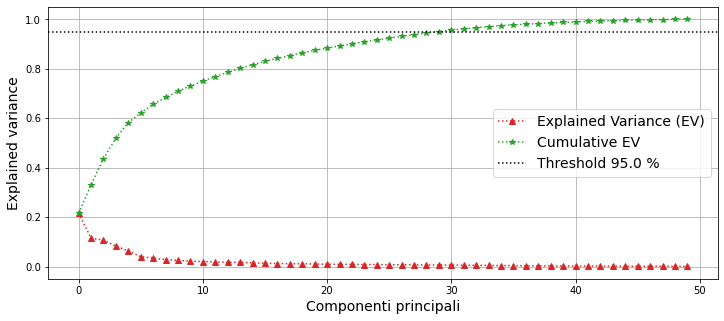

In [14]:
thr = .95

fig, ax = plt.subplots()
fig.set_size_inches(12, 5)

ax.plot(X_ev, ls = ":", marker = "^", label = "Explained Variance (EV)", c = "tab:red")
ax.plot(X_cumev, ls = ":", marker = "*", label  = "Cumulative EV", c = "tab:green")

ax.axhline(y = thr, ls = ":", c = "k", label = f"Threshold {thr*100} %")

ax.set_xlabel("Componenti principali", fontsize = 14)
ax.set_ylabel("Explained variance", fontsize = 14)

ax.grid()
ax.legend(fontsize = 14)


print(f"Features < thr: {np.sum(X_cumev <= thr)}")

fig.savefig("../LATEX/FIGURE/02-cum-ev.pdf", format = "pdf", bbox_inches = "tight")

plt.show()

Guardo la matrice di covarianza dopo la PCA. NON E' VERO: QUESTO RITORNA LA MATRICE DI COVARIANZA DEL MODELLO PRE-PCA. Quindi è identica a quella precedente.


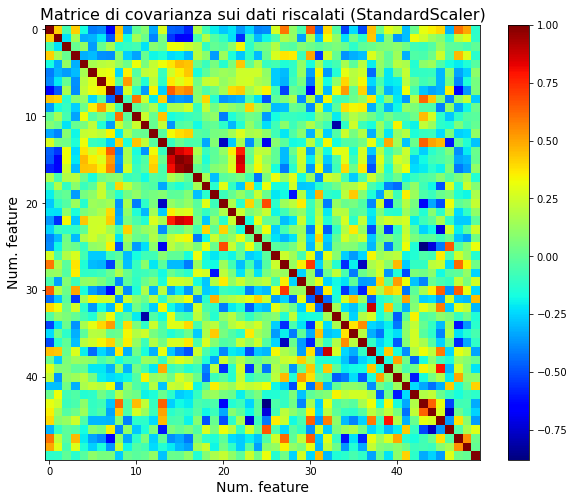

In [15]:
# Per la relazione devo rinunciare ad avere i numerini...
pcaCov = pca.get_covariance()


fig, ax = plt.subplots()
fig.set_size_inches(30, 28)
fig.set_size_inches(10,8)

# Plotto la matrice di covarianza
im = ax.imshow(pcaCov, cmap = "jet", origin = "upper")

ax.set_title(f"Matrice di covarianza sui dati riscalati ({scaledMode})", fontsize = 16)
ax.set_xlabel(f"Num. feature", fontsize = 14)
ax.set_ylabel(f"Num. feature", fontsize = 14)

# Stampo i valori sulle celle
# for i in range(myCov.shape[0]):
#     for j in range(myCov.shape[1]):
#         text = ax.text(j, i, f"{pcaCov[i, j]:.2f}",
#                        ha="center", va="center", color="w", )#weight="semibold")

# Disegno la colorbar
fig.colorbar(im)

fig.savefig("../LATEX/FIGURE/02-cov-matrix.pdf", format = "pdf", bbox_inches = "tight")

plt.show()